In [1]:
# 3/3/2019
# Predicting Evictions 

import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# pandas options to display all the summary statistics 
pd.set_option('display.max_columns', None)

# pandas options to suppress scientific notation 
pd.options.display.float_format = '{:.2f}'.format


In [3]:
# load datasets 
evict = pd.read_csv('C:/Users/josh/Desktop/python_datasets/train_values_capstone.csv')
labels= pd.read_csv('C:/Users/josh/Desktop/python_datasets/train_labels_capstone.csv')

In [4]:
# explore data 
print(evict.shape)
print(labels.shape)

(2546, 48)
(2546, 2)


In [5]:
# check for duplicate records
print(evict.row_id.duplicated().value_counts())
print(labels.row_id.duplicated().value_counts())

# .nunique() - could be used as well 

False    2546
Name: row_id, dtype: int64
False    2546
Name: row_id, dtype: int64


In [6]:
evict.isnull().sum()/(len(evict))*100

row_id                                        0.00
county_code                                   0.00
year                                          0.00
state                                         0.00
population                                    0.00
renter_occupied_households                    0.00
pct_renter_occupied                           0.00
median_gross_rent                             0.00
median_household_income                       0.08
median_property_value                         0.08
rent_burden                                   0.00
pct_white                                     0.00
pct_af_am                                     0.00
pct_hispanic                                  0.00
pct_am_ind                                    0.00
pct_asian                                     0.00
pct_nh_pi                                     0.00
pct_multiple                                  0.00
pct_other                                     0.00
poverty_rate                   

In [7]:
# data quality 
print(evict.isnull().sum())
print(labels.isnull().sum())

row_id                                           0
county_code                                      0
year                                             0
state                                            0
population                                       0
renter_occupied_households                       0
pct_renter_occupied                              0
median_gross_rent                                0
median_household_income                          2
median_property_value                            2
rent_burden                                      0
pct_white                                        0
pct_af_am                                        0
pct_hispanic                                     0
pct_am_ind                                       0
pct_asian                                        0
pct_nh_pi                                        0
pct_multiple                                     0
pct_other                                        0
poverty_rate                   

C:\Users\josh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\josh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([306., 638., 654., 358., 167.,  72.,  28.,   9.,   3.,   3.]),
 array([ 3.09 , 10.386, 17.682, 24.978, 32.274, 39.57 , 46.866, 54.162,
        61.458, 68.754, 76.05 ]),
 <a list of 10 Patch objects>)

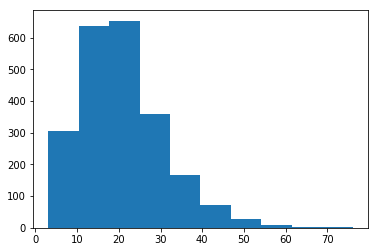

In [8]:
plt.hist(evict.motor_vehicle_crash_deaths_per_100k)

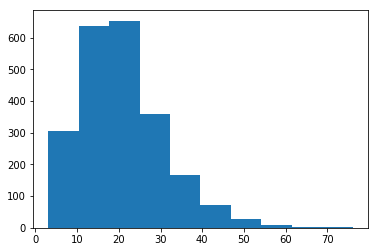

In [9]:
# this is code teardown 
# previous model shows motor_vehicle_crash_deaths_per_100k 
# has some correlation with the labels
# replace null values with the mean 

# visualize distribution - make decision mean or median replacement for NaN values
plt.hist(evict.motor_vehicle_crash_deaths_per_100k)


# fill missing values 
evict.motor_vehicle_crash_deaths_per_100k.fillna(evict.motor_vehicle_crash_deaths_per_100k.mean(), inplace = True)

In [10]:
# drop remaining features with null values 
# Note: .dropna() - removes any record with an na value
#                   better to explicately remove specific columns
#                   evict = evict.dropna()

col = ['median_household_income', 'median_property_value','pct_adult_smoking',
      'pct_low_birthweight', 'pct_excessive_drinking', 'homicides_per_100k',
      'pop_per_dentist', 'pop_per_primary_care_physician', 'air_pollution_particulate_matter_value']

evict.drop(col, inplace = True, axis = 1)

In [11]:


# categorical value counts - .value_counts()
# note: for value_counts include (dropna = False)
# Note: the dropna = False allows you to see null vulues
# evict['county_code'].value_counts(dropna = False)



In [12]:
# data exploration
evict.head(1)

,row_id,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,rucc,urban_influence,economic_typology,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_diabetes,pct_physical_inactivity,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
0,0,a4e2211,b,d725a95,45009.00,6944.00,37.22,643.00,33.39,0.41,0.49,0.07,0.00,0.00,0.00,0.02,0.00,18.45,"Nonmetro - Urban population of 20,000 or more,...",Micropolitan adjacent to a large metro area,Nonspecialized,0.41,0.09,0.24,0.07,0.33,0.14,0.31,18.21,318,0.53,0.25,0.15,0.23,0.38,0.28,0.11,12.92,11.21


In [13]:
# data exploration 
labels.head(1)

,row_id,evictions
0,0,681


In [14]:
# number of columns 
len(evict.columns)

39

In [15]:
# data types 
evict.dtypes

row_id                                          int64
county_code                                    object
year                                           object
state                                          object
population                                    float64
renter_occupied_households                    float64
pct_renter_occupied                           float64
median_gross_rent                             float64
rent_burden                                   float64
pct_white                                     float64
pct_af_am                                     float64
pct_hispanic                                  float64
pct_am_ind                                    float64
pct_asian                                     float64
pct_nh_pi                                     float64
pct_multiple                                  float64
pct_other                                     float64
poverty_rate                                  float64
rucc                        

In [16]:
# Categorical value counts - year
evict['year'].value_counts(dropna = False)

b    1279
a    1267
Name: year, dtype: int64

In [17]:
# Categorical value counts - state
evict['state'].value_counts(dropna = False)

930f257    228
dc52510    137
9759812    123
f93b51e    110
f2c60ec    100
533155c     96
d725a95     94
f723d72     94
56f170e     92
2af7250     90
26926ff     88
a972798     85
a8981de     85
92a2585     80
37520b7     79
f02e4c4     72
c8ee9c4     71
3c7c507     70
105ac14     68
8af7339     62
f1f4f42     61
429dafa     60
408e6ed     58
720fc77     46
bf46354     39
6f7cad6     34
bd5a09a     34
c47295b     32
d897010     30
e159269     29
b5e230e     26
ea48b30     26
be99678     25
9cfd721     24
7c920dc     20
ad42790     18
0df5b61     16
638a64a     12
7991172      8
a7fb65d      6
e602fb0      6
de1c9a5      4
c79e512      4
4a85da6      3
9216eca      1
Name: state, dtype: int64

In [18]:
# number of states represented in the dataset 
evict['state'].nunique()

45

In [19]:
# merge data sets based on row_id 
alldata = pd.merge(evict, labels, 
                  right_on = 'row_id', 
                  left_on = 'row_id')

In [20]:
# Exploratory Analysis - Capstone questions 
alldata['evictions'].describe()

count    2546.00
mean      378.05
std      1405.28
min         0.00
25%         4.00
50%        29.00
75%       160.75
max     29251.00
Name: evictions, dtype: float64

C:\Users\josh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


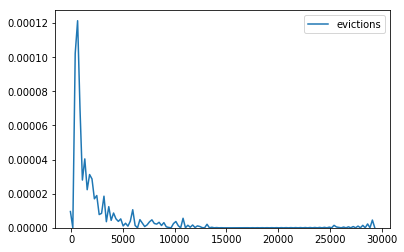

In [21]:
# kde plot of evictions 
sns.kdeplot(alldata['evictions'])

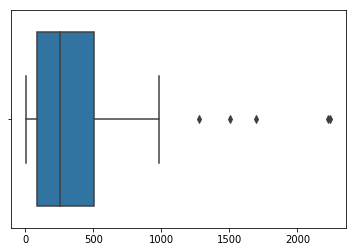

In [22]:
# evictions across states 

# Groupby - when selecting multiple columns use [[]] - double square brackets - subset - then defining a list 

sns.boxplot(alldata[['state', 'evictions']].groupby('state').mean())

# See below for all descriptive statistics 
# alldata[['state', 'evictions']].groupby('state').describe()

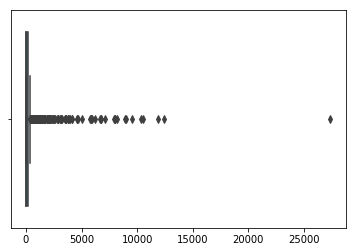

In [23]:
# evictions across counties 
sns.boxplot(alldata[['county_code', 'evictions']].groupby('county_code').mean())

# Descriptive for all counties 
# alldata[['county_code', 'evictions']].groupby('county_code').describe()

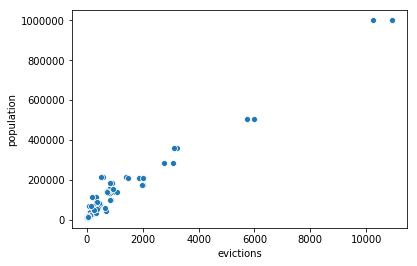

In [24]:
# describe the relationship between population size and number of evictions for county d725a95

sns.scatterplot(x = alldata.loc[alldata['state'] == 'd725a95'].evictions, y = alldata.loc[alldata['state'] == 'd725a95'].population)

In [25]:
# A powerful interactive bokeh plot 
# Interactive visualization using bokeh 
# Its pretty cool 
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
from bokeh.models import HoverTool
from bokeh.io import output_notebook

# creates the bokeh plot inline in the notebook 
output_notebook()

source = ColumnDataSource(alldata)

p = figure()

p.circle(x='population', y='evictions', source=source,
         size=10, color='red', alpha=0.6)

hover_tool = HoverTool(tooltips = [('county_code','@county_code'), ('year', '@year')])

p.add_tools(hover_tool)

# make y-axis not in scientific notation 
p.below[0].formatter.use_scientific = False

show(p)

Loading BokehJS ...

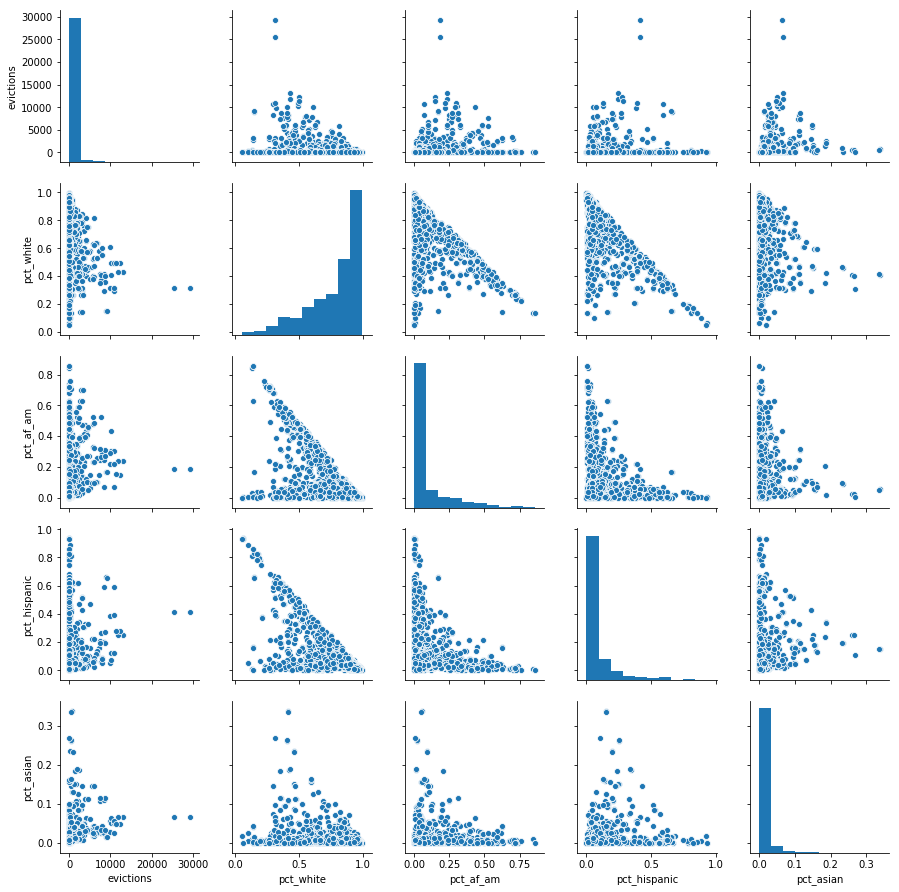

In [26]:
# looking for correlations across variables with a pairplot 
cols = ['evictions', 'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_asian']

sns.pairplot(alldata[cols])

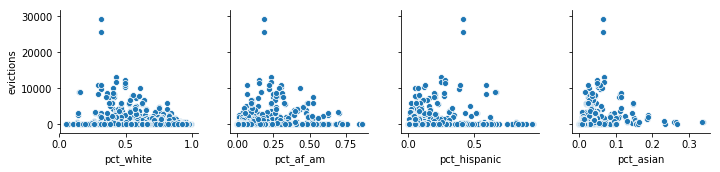

In [27]:
# example of pulling out a correlation plot of just the row or column you want 

sns.pairplot(data = alldata, x_vars = ['pct_white', 'pct_af_am', 'pct_hispanic', 'pct_asian'], 
                             y_vars = ['evictions'])

In [28]:
# Correlation Matrix
cols = ['evictions', 'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_asian']

corr = alldata[cols].corr()

print(corr)

              evictions  pct_white  pct_af_am  pct_hispanic  pct_asian
evictions          1.00      -0.28       0.20          0.14       0.32
pct_white         -0.28       1.00      -0.63         -0.64      -0.27
pct_af_am          0.20      -0.63       1.00         -0.11       0.04
pct_hispanic       0.14      -0.64      -0.11          1.00       0.15
pct_asian          0.32      -0.27       0.04          0.15       1.00


(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text xticklabel objects>)

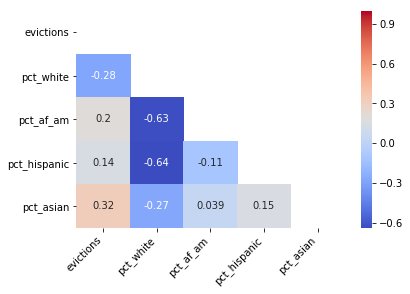

In [29]:
# heatmap for correlation matrix
# more powerful as a visualization 

# create a mask so that only on side of the correlation matrix appears 
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# correlation heatmap
cols = ['evictions', 'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_asian']
corr = alldata[cols].corr()
sns.heatmap(corr, cmap = 'coolwarm', annot = True, mask = mask)
plt.xticks(rotation = 45, ha = 'right')


In [30]:
# heatmap of correlations for all columns that a numeric datatypes 

In [31]:
# Note: quick way to subset all columns that not numeric 
alldata.select_dtypes(exclude='object').columns


Index(['row_id', 'population', 'renter_occupied_households',
       'pct_renter_occupied', 'median_gross_rent', 'rent_burden', 'pct_white',
       'pct_af_am', 'pct_hispanic', 'pct_am_ind', 'pct_asian', 'pct_nh_pi',
       'pct_multiple', 'pct_other', 'poverty_rate', 'pct_civilian_labor',
       'pct_unemployment', 'pct_uninsured_adults', 'pct_uninsured_children',
       'pct_adult_obesity', 'pct_diabetes', 'pct_physical_inactivity',
       'motor_vehicle_crash_deaths_per_100k',
       'heart_disease_mortality_per_100k', 'pct_female',
       'pct_below_18_years_of_age', 'pct_aged_65_years_and_older',
       'pct_adults_less_than_a_high_school_diploma',
       'pct_adults_with_high_school_diploma', 'pct_adults_with_some_college',
       'pct_adults_bachelors_or_higher', 'birth_rate_per_1k',
       'death_rate_per_1k', 'evictions'],
      dtype='object')

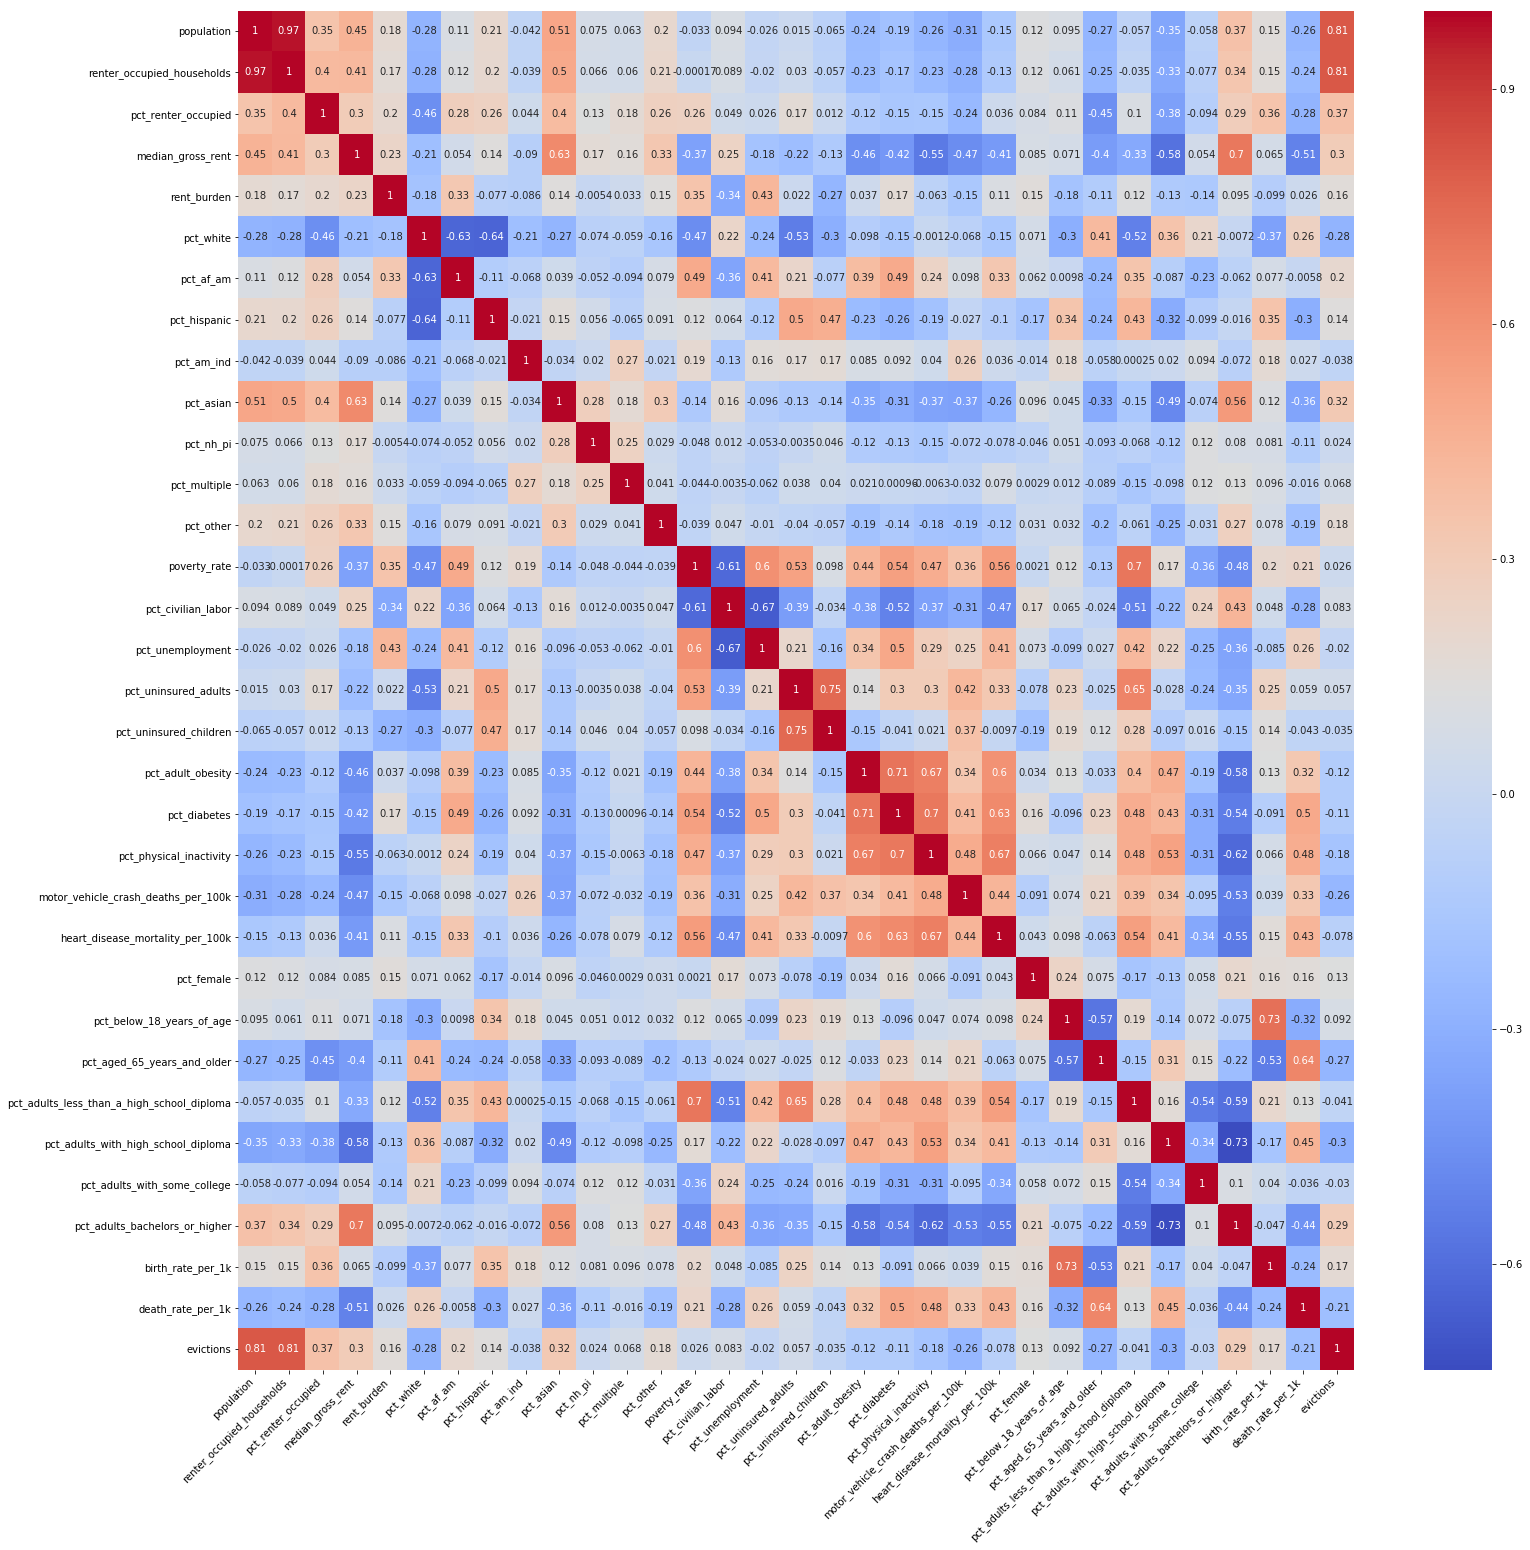

In [32]:
# remove row_id in heatmap 

cols = ['population', 'renter_occupied_households',
       'pct_renter_occupied', 'median_gross_rent', 'rent_burden', 'pct_white',
       'pct_af_am', 'pct_hispanic', 'pct_am_ind', 'pct_asian', 'pct_nh_pi',
       'pct_multiple', 'pct_other', 'poverty_rate', 'pct_civilian_labor',
       'pct_unemployment', 'pct_uninsured_adults', 'pct_uninsured_children',
       'pct_adult_obesity', 'pct_diabetes', 'pct_physical_inactivity',
       'motor_vehicle_crash_deaths_per_100k',
       'heart_disease_mortality_per_100k', 'pct_female',
       'pct_below_18_years_of_age', 'pct_aged_65_years_and_older',
       'pct_adults_less_than_a_high_school_diploma',
       'pct_adults_with_high_school_diploma', 'pct_adults_with_some_college',
       'pct_adults_bachelors_or_higher', 'birth_rate_per_1k',
       'death_rate_per_1k', 'evictions']

corr = alldata[cols].corr()


# create figure, default plot will be too small
fig, ax = plt.subplots(figsize=(25,25))

# create heatmap
sns.heatmap(corr, cmap = 'coolwarm', annot = True, ax = ax)
plt.xticks(rotation = 45, ha = 'right')

# save the figure to a file for use in an executive summary 
# save picture
fig = ax.get_figure()
fig.savefig('heatmap_evictions.png')


In [33]:
# analyzing only specific states - de1c9a5 and e602fb0

alldata[['year', 'state', 'evictions']].groupby(['state', 'year']).describe().loc[['de1c9a5', 'e602fb0']].transpose()

state           de1c9a5         e602fb0        
year                  a       b       a       b
evictions count    2.00    2.00    2.00    4.00
          mean  2225.00 2259.00 1557.00  700.50
          std   1919.09 1845.55 2196.27 1336.35
          min    868.00  954.00    4.00    1.00
          25%   1546.50 1606.50  780.50    3.25
          50%   2225.00 2259.00 1557.00   48.50
          75%   2903.50 2911.50 2333.50  745.75
          max   3582.00 3564.00 3110.00 2704.00

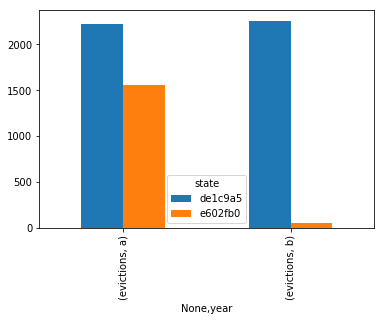

In [34]:
# the visualization here is a litte deciving - would need a maximum bar to cut across the visual to clearly see 
# median evictions has increased in year b for state - de1c9a5

alldata[['year', 'state', 'evictions']].groupby(['state', 'year']).median().loc[['de1c9a5', 'e602fb0']].unstack().transpose().plot(kind = 'bar')

In [35]:
############################################################################
# Regression model to predict eviction 

# data quality check 

alldata.isnull().sum()

row_id                                        0
county_code                                   0
year                                          0
state                                         0
population                                    0
renter_occupied_households                    0
pct_renter_occupied                           0
median_gross_rent                             0
rent_burden                                   0
pct_white                                     0
pct_af_am                                     0
pct_hispanic                                  0
pct_am_ind                                    0
pct_asian                                     0
pct_nh_pi                                     0
pct_multiple                                  0
pct_other                                     0
poverty_rate                                  0
rucc                                          0
urban_influence                               0
economic_typology                       

In [36]:
# data type check 
alldata.dtypes

row_id                                          int64
county_code                                    object
year                                           object
state                                          object
population                                    float64
renter_occupied_households                    float64
pct_renter_occupied                           float64
median_gross_rent                             float64
rent_burden                                   float64
pct_white                                     float64
pct_af_am                                     float64
pct_hispanic                                  float64
pct_am_ind                                    float64
pct_asian                                     float64
pct_nh_pi                                     float64
pct_multiple                                  float64
pct_other                                     float64
poverty_rate                                  float64
rucc                        

In [37]:
# machine learning only works with numeric values 
# must dummy code categorical values that have predictive power 

# dummy code - year 
alldata = pd.concat([alldata, (pd.get_dummies(alldata['year'], prefix = 'year_dummies', drop_first= True))], axis =1)

# drop the year feature, its now dummy coded 
alldata.drop('year', inplace = True, axis = 1)

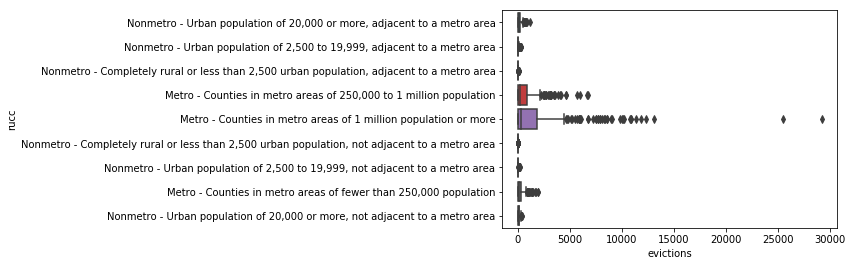

In [38]:
# the feature 'rucc'  contains categorical data that might be usefuil for predicting evictions 

# visual to see distribution of data 
sns.boxplot(x = alldata['evictions'], y = alldata['rucc'])

In [39]:
alldata[['evictions', 'rucc']].groupby('rucc').median().sort_values(by = 'evictions', ascending = False)

,evictions
rucc,
Metro - Counties in metro areas of 1 million population or more,311.50
"Metro - Counties in metro areas of 250,000 to 1 million population",206.00
"Nonmetro - Urban population of 20,000 or more, adjacent to a metro area",133.50
"Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area",102.00
"Metro - Counties in metro areas of fewer than 250,000 population",97.00
"Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area",27.50
"Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area",10.00
"Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area",4.00
"Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area",1.00


In [40]:
# code 'rucc' in an ordinal fashion based off median values 
alldata['rucc_feature_engineered'] = alldata['rucc'].map({'Metro - Counties in metro areas of 1 million population or more': 311, 
                                                         'Metro - Counties in metro areas of 250,000 to 1 million population': 206, 
                                                         'Nonmetro - Urban population of 20,000 or more, adjacent to a metro area': 133, 
                                                         'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area': 102, 
                                                         'Metro - Counties in metro areas of fewer than 250,000 population': 97, 
                                                         'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area': 27, 
                                                         'Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area': 10, 
                                                         'Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area': 4, 
                                                         'Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area': 1})

# drop feature its now dummy coded 
alldata.drop('rucc', inplace = True, axis = 1)

In [41]:
# drop categorical data that is redundant or doesn't hold predicitive value 
# drop row_id - not useful for prediction 

cols = ['row_id', 'county_code', 'state', 'urban_influence',
       'economic_typology']

alldata.drop(cols, inplace = True, axis = 1)

# drop median_gross_rent - has missing values in the test set 
alldata.drop(['median_gross_rent'], inplace = True, axis =1)


In [42]:
# Place Holder - Need to scale values but not sure how go about doing this 
########
#######
#######

alldata.columns

Index(['population', 'renter_occupied_households', 'pct_renter_occupied',
       'rent_burden', 'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind',
       'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other', 'poverty_rate',
       'pct_civilian_labor', 'pct_unemployment', 'pct_uninsured_adults',
       'pct_uninsured_children', 'pct_adult_obesity', 'pct_diabetes',
       'pct_physical_inactivity', 'motor_vehicle_crash_deaths_per_100k',
       'heart_disease_mortality_per_100k', 'pct_female',
       'pct_below_18_years_of_age', 'pct_aged_65_years_and_older',
       'pct_adults_less_than_a_high_school_diploma',
       'pct_adults_with_high_school_diploma', 'pct_adults_with_some_college',
       'pct_adults_bachelors_or_higher', 'birth_rate_per_1k',
       'death_rate_per_1k', 'evictions', 'year_dummies_b',
       'rucc_feature_engineered'],
      dtype='object')

In [43]:
# Machine Learning Model 
# train_test_split method 

#split data from to train_data and labels

cols = ['population', 'renter_occupied_households', 'pct_renter_occupied',
       'rent_burden', 'pct_white', 'pct_af_am',
       'pct_hispanic', 'pct_am_ind', 'pct_asian', 'pct_nh_pi', 'pct_multiple',
       'pct_other', 'poverty_rate', 'pct_civilian_labor', 'pct_unemployment',
       'pct_uninsured_adults', 'pct_uninsured_children', 'pct_adult_obesity',
       'pct_diabetes', 'pct_physical_inactivity',
       'motor_vehicle_crash_deaths_per_100k',
       'heart_disease_mortality_per_100k', 'pct_female',
       'pct_below_18_years_of_age', 'pct_aged_65_years_and_older',
       'pct_adults_less_than_a_high_school_diploma',
       'pct_adults_with_high_school_diploma', 'pct_adults_with_some_college',
       'pct_adults_bachelors_or_higher', 'birth_rate_per_1k',
       'death_rate_per_1k', 'year_dummies_b',
       'rucc_feature_engineered']




train_data = alldata[cols]
labels = alldata['evictions']

# split data 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(train_data, labels, test_size = 0.3)

# build linear regression model 
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm = lm.fit(X_train, y_train)

# model is now trained 
# test model r2 score 
from sklearn.metrics import r2_score 
y_prediction = lm.predict(X_test)
r2_score(y_test, y_prediction)

# caution here a lucky split of data could give an artificially high r2 score 
# better to use cross_validation 

0.533990504483415

In [44]:
######################################################################################
######################################################################################
# Try Submission using linear regression 

test = pd.read_csv('C:/Users/josh/Desktop/python_datasets/test_values_capstone.csv')
test.motor_vehicle_crash_deaths_per_100k.fillna(evict.motor_vehicle_crash_deaths_per_100k.mean(), inplace = True)
col = ['median_household_income', 'median_property_value','pct_adult_smoking',
      'pct_low_birthweight', 'pct_excessive_drinking', 'homicides_per_100k',
      'pop_per_dentist', 'pop_per_primary_care_physician', 'air_pollution_particulate_matter_value']
test.drop(col, inplace = True, axis = 1)
test_data = pd.concat([test, (pd.get_dummies(test['year'], prefix = 'year_dummies', drop_first= True))], axis =1)
test_data.drop('year', inplace = True, axis = 1)
test_data['rucc_feature_engineered'] = test_data['rucc'].map({'Metro - Counties in metro areas of 1 million population or more': 311, 
                                                         'Metro - Counties in metro areas of 250,000 to 1 million population': 206, 
                                                         'Nonmetro - Urban population of 20,000 or more, adjacent to a metro area': 133, 
                                                         'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area': 102, 
                                                         'Metro - Counties in metro areas of fewer than 250,000 population': 97, 
                                                         'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area': 27, 
                                                         'Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area': 10, 
                                                         'Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area': 4, 
                                                         'Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area': 1})
# drop feature its now dummy coded 
test_data.drop('rucc', inplace = True, axis = 1)
# drop median_gross_rent - has missing values in the test set 
test_data.drop(['median_gross_rent'], inplace = True, axis =1)
cols = ['row_id', 'county_code', 'state', 'urban_influence',
       'economic_typology']
test_data.drop(cols, inplace = True, axis = 1)

#test_data.isnull().sum()
y_prediction = lm.predict(test_data)

y_prediciton = pd.DataFrame(y_prediction)
y_prediciton.to_csv('predictions_eviction.csv', index = False, header = None)

# see output file
# negative predictions were covnerted to 0 in the csv file 
########################################################################################
########################################################################################

In [45]:
# machine learning model with cross_validation 

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
scores = cross_val_score(lm, train_data, labels, cv = 10)
scores

array([0.80120502, 0.61513089, 0.63294449, 0.50932392, 0.73464208,
       0.69524169, 0.70818685, 0.32847324, 0.37787393, 0.78578181])

In [46]:
scores.mean()

0.618880392434469

In [47]:
# We can see the r2 score is not good 
# Feature Selection is needed 
# Feature Selection to eliminate zero variance and low variance features 

from sklearn import feature_selection as fs 
# set variance threshold at 0.8
sel = fs.VarianceThreshold(threshold = (0.8*(1-0.8)))
train_data_feature_selected = sel.fit_transform(train_data)

# get_support - shows the true ro false regarding which features will be included 
print(train_data.shape)
print(sel.get_support())
print(train_data_feature_selected.shape)
print(train_data.columns)

(2546, 33)
[ True  True  True  True False False False False False False False False
  True False False False False False False False  True  True False False
 False False False False False  True  True  True  True]
(2546, 11)
Index(['population', 'renter_occupied_households', 'pct_renter_occupied',
       'rent_burden', 'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind',
       'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other', 'poverty_rate',
       'pct_civilian_labor', 'pct_unemployment', 'pct_uninsured_adults',
       'pct_uninsured_children', 'pct_adult_obesity', 'pct_diabetes',
       'pct_physical_inactivity', 'motor_vehicle_crash_deaths_per_100k',
       'heart_disease_mortality_per_100k', 'pct_female',
       'pct_below_18_years_of_age', 'pct_aged_65_years_and_older',
       'pct_adults_less_than_a_high_school_diploma',
       'pct_adults_with_high_school_diploma', 'pct_adults_with_some_college',
       'pct_adults_bachelors_or_higher', 'birth_rate_per_1k',
       'death

In [48]:
# reduced feature set is called - train_data_feature_selected 

# Feature Reduction - we will add each feature to the model 1 by 1 to see which features should be kept in the model 
# I believe this a greedy type algorithm where features are added one by one 

import sklearn.model_selection as ms 
from sklearn.linear_model import LinearRegression
from sklearn import feature_selection as fs 

feature_folds = ms.KFold(n_splits = 10, shuffle = True)

# define the model 
lm = LinearRegression()

# Perform feature selection by CV with high variance features only 
selector = fs.RFECV(estimator = lm, cv = feature_folds)
selector = selector.fit(train_data_feature_selected, labels)
selector.support_

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [49]:
# see which features have the most predictive power 
selector.ranking_

# ranking of 1 means it will be kept in the feature set 

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [50]:
# Reduce our features with selector.transform 
train_data_feature_selected = selector.transform(train_data_feature_selected)


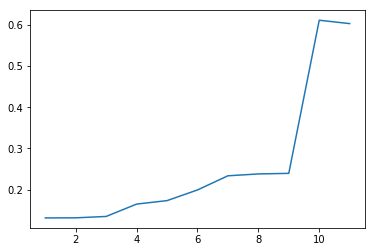

In [51]:
# plot the AUC vs the numer of features 
plt.plot(range(1, len(selector.grid_scores_)+1), selector.grid_scores_)

In [52]:
# train model with reduced feature set 

from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
scores = cross_val_score(lm, train_data_feature_selected, labels, cv = 10, scoring = 'r2')
scores

array([0.76137215, 0.44976162, 0.57370887, 0.54275684, 0.7138069 ,
       0.70393191, 0.6653758 , 0.3606664 , 0.22934338, 0.83034951])

In [53]:
scores.mean()

0.5831073404241675

### Boosted Decision Tree Regression - build in Azure ML 
###   Evaulate actual vs predicted here 

In [54]:
# load datasets 
train_data_set = pd.read_csv('C:/Users/josh/Desktop/python_datasets/train_values_capstone.csv')
train_scored_data= pd.read_csv('C:/Users/josh/Desktop/python_datasets/train_and_predicted_values_capstone.csv')

In [55]:
scored = pd.merge(train_data_set, train_scored_data, 
                 right_on = 'row_id', 
                 left_on = 'row_id')

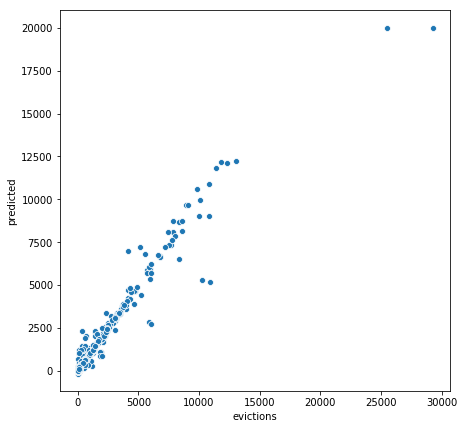

In [56]:
# create figure, default plot will be too small
fig, ax = plt.subplots(figsize=(7,7))

# create scatter plot
sns.scatterplot(x = scored['evictions'], y = scored['predicted'], ax = ax)

fig = ax.get_figure()
fig.savefig('state_evictions_scored_1.png')

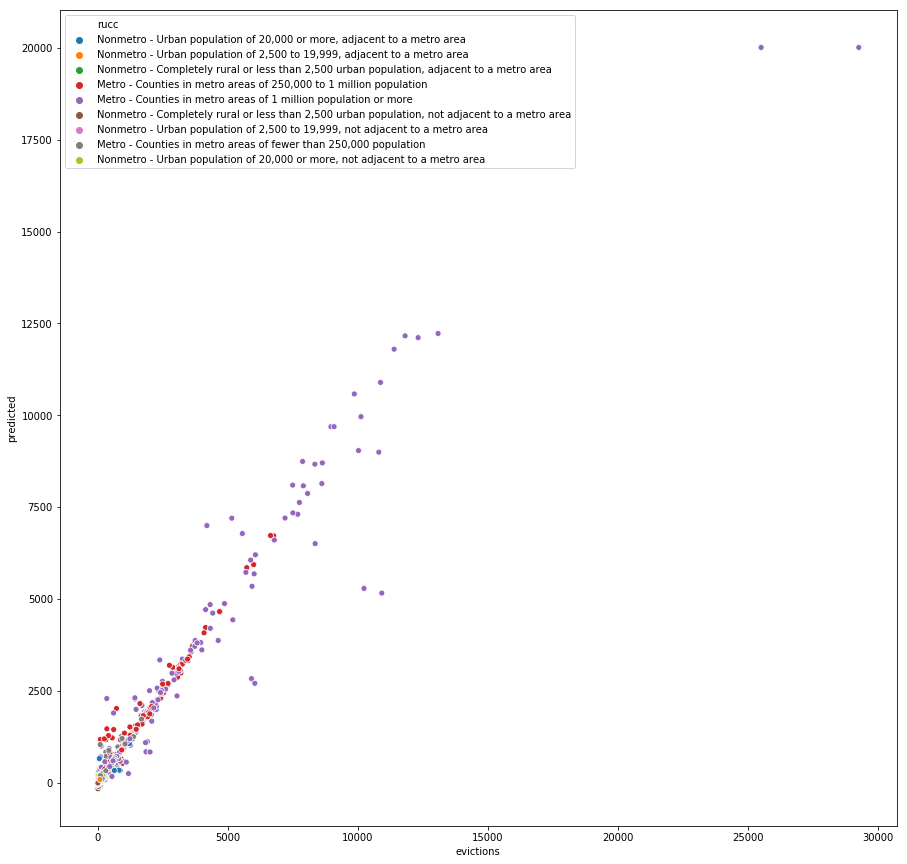

In [57]:
# create figure, default plot will be too small
fig, ax = plt.subplots(figsize=(15,15))

# create scatter plot
sns.scatterplot(x = scored['evictions'], y = scored['predicted'], hue = scored['rucc'], ax = ax)

#fig = ax.get_figure()
#fig.savefig('state_evictions_scored.png')

In [58]:
from bokeh.io import output_notebook
from bokeh.palettes import brewer
from bokeh.plotting import figure, show
import pandas

# Assumes df => data frame with columns: X_Data, Y_Data, Factor

# Create colors for each treatment 
# Rough Source: http://bokeh.pydata.org/en/latest/docs/gallery/brewer.html#gallery-brewer
# Fine Tune Source: http://bokeh.pydata.org/en/latest/docs/gallery/iris.html

# Get the number of colors we'll need for the plot.
colors = 45

# Create a map between factor and color.
colormap = {i: colors[i] for i in scored.state.unique()}

# Create a list of colors for each value that we will be looking at.
colors = [colormap[x] for x in scored.state]

# Generate the figure.
output_notebook()
p = figure(plot_width=800, plot_height=400)

# add a circle renderer with a size, color, and alpha
p.circle(scored['evictions'], df['predictions'], size=5, color=colors)

# show the results
show(p)

#show(p)

TypeError: 'int' object is not subscriptable

In [ ]:
p.scatter(x = scored.evictions, y = scored.predicted, source=scored, legend="state", fill_alpha=0.4, size=12,
         
          color=factor_cmap('state', 'Category10_3', SPECIES))

show(p)






In [ ]:
# once we decide we like the model - then train on all of the data 

### Try using a neural net to get better results 

In [ ]:
# Import data for neural net training 

# evict_nn = pd.read_csv('C:/Users/josh/Desktop/python_datasets/train_values_capstone.csv')
# labels_nn= pd.read_csv('C:/Users/josh/Desktop/python_datasets/train_labels_capstone.csv')

# # fill missing values 
# evict_nn.motor_vehicle_crash_deaths_per_100k.fillna(evict.motor_vehicle_crash_deaths_per_100k.mean(), inplace = True)

# # transform population to log population 
# evict_nn['population'] = np.log10(evict_nn['population'])

# # drop features with hight precentage of null values 
# # Note: .dropna() - removes any record with an na value
# #                   better to explicately remove specific columns
# #                   evict = evict.dropna()

# col = ['median_household_income', 'median_property_value','pct_adult_smoking',
#       'pct_low_birthweight', 'pct_excessive_drinking', 'homicides_per_100k',
#       'pop_per_dentist', 'pop_per_primary_care_physician', 'air_pollution_particulate_matter_value']

# evict_nn.drop(col, inplace = True, axis = 1)

# # merge data sets based on row_id 
# alldata_nn = pd.merge(evict_nn, labels_nn, 
#                   right_on = 'row_id', 
#                   left_on = 'row_id')

# # machine learning only works with numeric values 
# # must dummy code categorical values that have predictive power 

# alldata_nn['rucc_feature_engineered'] = alldata_nn['rucc'].map({'Metro - Counties in metro areas of 1 million population or more': 311, 
#                                                          'Metro - Counties in metro areas of 250,000 to 1 million population': 206, 
#                                                          'Nonmetro - Urban population of 20,000 or more, adjacent to a metro area': 133, 
#                                                          'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area': 102, 
#                                                          'Metro - Counties in metro areas of fewer than 250,000 population': 97, 
#                                                          'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area': 27, 
#                                                          'Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area': 10, 
#                                                          'Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area': 4, 
#                                                          'Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area': 1})
# # drop feature its now dummy coded 
# alldata_nn.drop('rucc', inplace = True, axis = 1)

# # dummy code - one-hot-encoding

# cols = ['year', 'state', 'urban_influence','economic_typology']
# alldata_nn = pd.concat([alldata_nn, (pd.get_dummies(alldata_nn[cols], prefix = 'dummies', drop_first= True))], axis =1)

# # drop the year feature, its now dummy coded 
# alldata_nn.drop('year', inplace = True, axis = 1)
# alldata_nn.drop('state', inplace = True, axis = 1)
# alldata_nn.drop('urban_influence', inplace = True, axis = 1)
# alldata_nn.drop('economic_typology', inplace = True, axis = 1)
# # county code was not dummy coded - will expand the featues too greatly 
# alldata_nn.drop('county_code', inplace = True, axis = 1)

# # data frame now prepared


In [ ]:
# evict_nn.population

In [ ]:
# # create training data frame 

# cols = ['population', 'renter_occupied_households',
#        'pct_renter_occupied', 'median_gross_rent', 'rent_burden', 'pct_white',
#        'pct_af_am', 'pct_hispanic', 'pct_am_ind', 'pct_asian', 'pct_nh_pi',
#        'pct_multiple', 'pct_other', 'poverty_rate', 'pct_civilian_labor',
#        'pct_unemployment', 'pct_uninsured_adults', 'pct_uninsured_children',
#        'pct_adult_obesity', 'pct_diabetes', 'pct_physical_inactivity',
#        'motor_vehicle_crash_deaths_per_100k',
#        'heart_disease_mortality_per_100k', 'pct_female',
#        'pct_below_18_years_of_age', 'pct_aged_65_years_and_older',
#        'pct_adults_less_than_a_high_school_diploma',
#        'pct_adults_with_high_school_diploma', 'pct_adults_with_some_college',
#        'pct_adults_bachelors_or_higher', 'birth_rate_per_1k',
#        'death_rate_per_1k', 'rucc_feature_engineered',
#        'dummies_b', 'dummies_105ac14', 'dummies_26926ff', 'dummies_2af7250',
#        'dummies_37520b7', 'dummies_3c7c507', 'dummies_408e6ed',
#        'dummies_429dafa', 'dummies_4a85da6', 'dummies_533155c',
#        'dummies_56f170e', 'dummies_638a64a', 'dummies_6f7cad6',
#        'dummies_720fc77', 'dummies_7991172', 'dummies_7c920dc',
#        'dummies_8af7339', 'dummies_9216eca', 'dummies_92a2585',
#        'dummies_930f257', 'dummies_9759812', 'dummies_9cfd721',
#        'dummies_a7fb65d', 'dummies_a8981de', 'dummies_a972798',
#        'dummies_ad42790', 'dummies_b5e230e', 'dummies_bd5a09a',
#        'dummies_be99678', 'dummies_bf46354', 'dummies_c47295b',
#        'dummies_c79e512', 'dummies_c8ee9c4', 'dummies_d725a95',
#        'dummies_d897010', 'dummies_dc52510', 'dummies_de1c9a5',
#        'dummies_e159269', 'dummies_e602fb0', 'dummies_ea48b30',
#        'dummies_f02e4c4', 'dummies_f1f4f42', 'dummies_f2c60ec',
#        'dummies_f723d72', 'dummies_f93b51e',
#        'dummies_Micropolitan adjacent to a large metro area',
#        'dummies_Micropolitan adjacent to a small metro area',
#        'dummies_Micropolitan not adjacent to a metro area',
#        'dummies_Noncore adjacent to a large metro area',
#        'dummies_Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents',
#        'dummies_Noncore adjacent to a small metro with town of at least 2,500 residents',
#        'dummies_Noncore adjacent to micro area and contains a town of 2,500-19,999 residents',
#        'dummies_Noncore adjacent to micro area and does not contain a town of at least 2,500 residents',
#        'dummies_Noncore not adjacent to a metro/micro area and contains a town of 2,500  or more residents',
#        'dummies_Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents',
#        'dummies_Small-in a metro area with fewer than 1 million residents',
#        'dummies_Federal/State government-dependent',
#        'dummies_Manufacturing-dependent', 'dummies_Mining-dependent',
#        'dummies_Nonspecialized', 'dummies_Recreation']

# alldata_nn_features = alldata_nn[cols]


# # create label data frame 
# alldata_nn_labels = alldata_nn['evictions']

In [ ]:
# # Feature selection - based on variance 
# # Feature Selection to eliminate zero variance and low variance features 

# from sklearn import feature_selection as fs 
# # set variance threshold at 0.8
# sel = fs.VarianceThreshold(threshold = (0.8*(1-0.8)))
# alldata_nn_feature_selected = sel.fit_transform(alldata_nn_features)

# # get_support - shows the true ro false regarding which features will be included 
# print(alldata_nn_features.shape)
# print(sel.get_support())
# print(alldata_nn_feature_selected.shape)
# print(alldata_nn_features.columns)

In [ ]:
# alldata_nn_feature_selected

In [ ]:
# reduced feature set is called - alldata_nn_labels_feature_selected

# looks like MLP - does not allow for feature reduction 

# Feature Reduction - we will subtract each feature to the model 1 by 1 to see which features should be kept in the model 
# I believe this a greedy backwards type algorithm where features are removed one by one and the model is checked to see
# if there the feature impoved the model 

#nn_clf = MLPRegressor(hidden_layer_sizes = (100,100, 100)
#                      ,max_iter=900
#                     ,verbose=True)

# import sklearn.model_selection as ms 
# from sklearn import feature_selection as fs 

# feature_folds = ms.KFold(n_splits = 10, shuffle = True)

# # define the model 
# from sklearn.neural_network import MLPRegressor

# nnr = MLPRegressor()


# # Perform feature selection by CV with high variance features only 
# selector = fs.RFECV(estimator = nnr, cv = feature_folds)
# selector = selector.fit(alldata_nn_feature_selected, alldata_nn_labels)
# selector.support_

In [ ]:
# determine best coefficients for neural net 
# import sklearn.model_selection as model_selection
# from sklearn.metrics import r2_score

# ## Define the dictionary for the grid search and the model object to search on
# param_grid = {"alpha":[0.000001,0.00001,0.0001]
#               ,"early_stopping":[True, False]}

# ## Define the Neural Network model
# nnr = MLPRegressor(hidden_layer_sizes = (100,100,100)
#                       ,max_iter=200
#                      ,verbose=True
#                      ,solver = 'lbfgs'
#                   )

# ## Perform the grid search over the parameters

# nnr = model_selection.GridSearchCV(estimator = nnr, param_grid = param_grid
#                       ,cv = model_selection.KFold(n_splits=10, shuffle = True) # Use the inside folds
#                       ,scoring = 'r2'  #'neg_mean_squared_error' #https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error
#                       ,return_train_score = True
#                       ,n_jobs=-1)


# nnr.fit(alldata_nn_feature_selected, alldata_nn_labels)
# print(nnr.best_estimator_.alpha)
# print(nnr.best_estimator_.early_stopping)
# print(nnr.best_estimator_.beta_1)
# print(nnr.best_estimator_.beta_2)

In [ ]:
# # fit the model based on the parameters we have chosen 

# from sklearn.neural_network import MLPRegressor


# nnr = MLPRegressor(hidden_layer_sizes = (100,100,100)
#                       ,max_iter=900
#                      ,verbose=True
#                      ,solver = 'lbfgs')

# nnr.fit(alldata_nn_feature_selected, alldata_nn_labels)
# # model now fit need test data now 

In [ ]:
# # prepare the test dataset in the same way you prepared the training dataset 

# test = pd.read_csv('C:/Users/josh/Desktop/python_datasets/test_values_capstone.csv')

# # fill missing values 
# test.motor_vehicle_crash_deaths_per_100k.fillna(evict.motor_vehicle_crash_deaths_per_100k.mean(), inplace = True)

# # drop features with hight precentage of null values 
# # Note: .dropna() - removes any record with an na value
# #                   better to explicately remove specific columns
# #                   evict = evict.dropna()

# col = ['median_household_income', 'median_property_value','pct_adult_smoking',
#       'pct_low_birthweight', 'pct_excessive_drinking', 'homicides_per_100k',
#       'pop_per_dentist', 'pop_per_primary_care_physician', 'air_pollution_particulate_matter_value']

# test.drop(col, inplace = True, axis = 1)


# # machine learning only works with numeric values 
# # must dummy code categorical values that have predictive power 

# test['rucc_feature_engineered'] = test['rucc'].map({'Metro - Counties in metro areas of 1 million population or more': 311, 
#                                                          'Metro - Counties in metro areas of 250,000 to 1 million population': 206, 
#                                                          'Nonmetro - Urban population of 20,000 or more, adjacent to a metro area': 133, 
#                                                          'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area': 102, 
#                                                          'Metro - Counties in metro areas of fewer than 250,000 population': 97, 
#                                                          'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area': 27, 
#                                                          'Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area': 10, 
#                                                          'Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area': 4, 
#                                                          'Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area': 1})
# # drop feature its now dummy coded 
# test.drop('rucc', inplace = True, axis = 1)

# # dummy code - one-hot-encoding

# cols = ['year', 'state', 'urban_influence','economic_typology']
# test = pd.concat([test, (pd.get_dummies(test[cols], prefix = 'dummies', drop_first= True))], axis =1)

# # drop the year feature, its now dummy coded 
# test.drop('year', inplace = True, axis = 1)
# test.drop('state', inplace = True, axis = 1)
# test.drop('urban_influence', inplace = True, axis = 1)
# test.drop('economic_typology', inplace = True, axis = 1)
# # county code was not dummy coded - will expand the featues too greatly 
# test.drop('county_code', inplace = True, axis = 1)
# test.drop('row_id', inplace = True, axis =1)

# data frame now prepared

In [ ]:
# # use feature select as specified previously

# # test dataset has some null values in median_gross_rent - replace with median
# test.median_gross_rent.fillna(test.median_gross_rent.median(), inplace = True)

# # feature select so we feed the same data shape into the model 
# test_selected = sel.fit_transform(test)

In [ ]:
# test_predictions = nnr.predict(test_selected)

# print(len(test_predictions))

# # transform to a dataframe to then output to a csv file
# test_predictions = pd.DataFrame(test_predictions)
# test_predictions.to_csv('test_predictions_nn.csv', index = False, header = None)

### How do we fit a model with cross_val_score ?

In [ ]:
# Lets try regression trees

In [ ]:
# Neural net might be too much - processing very slow speed 

In [ ]:
# # Regression - Neuarl Network 
# alldata.columns

In [ ]:
# # convert data to an np.array
# features = np.array(alldata[['population', 'renter_occupied_households', 'pct_renter_occupied',
#        'median_gross_rent', 'rent_burden', 'pct_white', 'pct_af_am',
#        'pct_hispanic', 'pct_am_ind', 'pct_asian', 'pct_nh_pi', 'pct_multiple',
#        'pct_other', 'poverty_rate', 'pct_civilian_labor', 'pct_unemployment',
#        'pct_uninsured_adults', 'pct_uninsured_children', 'pct_adult_obesity',
#        'pct_diabetes', 'pct_physical_inactivity',
#        'motor_vehicle_crash_deaths_per_100k',
#        'heart_disease_mortality_per_100k', 'pct_female',
#        'pct_below_18_years_of_age', 'pct_aged_65_years_and_older',
#        'pct_adults_less_than_a_high_school_diploma',
#        'pct_adults_with_high_school_diploma', 'pct_adults_with_some_college',
#        'pct_adults_bachelors_or_higher', 'birth_rate_per_1k',
#        'death_rate_per_1k', 'year_dummies_b',
#        'rucc_feature_engineered']])

# labels = np.array(alldata['evictions'])

In [ ]:
# # scale our features
# from sklearn import preprocessing 

# scale = preprocessing.StandardScaler()
# scale.fit(features)
# features = scale.transform(features)
# features

In [ ]:
# from sklearn.model_selection import cross_val_score
# from sklearn import preprocessing
# import sklearn.model_selection as model_selection

# #this defines the inner cross-validation
# insidereg = model_selection.KFold(n_splits=10, shuffle = True)

# #this defines outer cross-validation

# outsidereg = model_selection.KFold(n_splits=10, shuffle = True)

In [ ]:
# from sklearn.neural_network import MLPRegressor

# ## Define the dictionary for the grid search and the model object to search on
# param_grid = {"alpha":[0.0000001,0.000001,0.00001], 
#               "early_stopping":[True, False], 
#               "beta_1":[0.95,0.90,0.80], 
#               "beta_2":[0.999,0.9,0.8]}

# ## Define the Neural Network model
# nn_clf = MLPRegressor(hidden_layer_sizes = (100,100, 100)
#                       ,max_iter=900
#                      ,verbose=True)

# ## Perform the grid search over the parameters

# nn_clf = model_selection.GridSearchCV(estimator = nn_clf, param_grid = param_grid
#                       ,cv = insidereg # Use the inside folds
#                       ,scoring = 'neg_mean_squared_error' #https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error
#                       ,return_train_score = True
#                       ,n_jobs=-1)


# nn_clf.fit(features, labels)
# print(nn_clf.best_estimator_.alpha)
# print(nn_clf.best_estimator_.early_stopping)
# print(nn_clf.best_estimator_.beta_1)
# print(nn_clf.best_estimator_.beta_2)

In [ ]:
# cv_estimate_nn = model_selection.cross_val_score(nn_clf, features, labels, 
#                                  cv = outsidereg) # Use the outside folds

# print('Mean performance metric = %4.3f' % np.mean(cv_estimate_nn))
# print('SDT of the metric       = %4.3f' % np.std(cv_estimate_nn))
# print('Outcomes by cv fold')
# for i, x in enumerate(cv_estimate_nn):
#     print('Fold %2d    %4.3f' % (i+1, x))

In [ ]:
# finalreg = model_selection.KFold(n_splits=10, shuffle = True)

In [ ]:
# sns.scatterplot(x = alldata['evictions'], y = alldata['population'])

In [ ]:
# set my python number display options 
pd.options.display.float_format = '{:.2f}'.format

In [ ]:


# alldata['population'].describe()